<a href="https://colab.research.google.com/github/stellacherotich/Diabetes-Solutions/blob/main/DiabetesSolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Solutions Hackathon**


Contributors : Jimcollins Wamae, Rosemary Mburu, and Stella Kitur

### Project Overview


### Problem Statement


### Project Objectives
the goal is to find meaningful inferences(features) which in turn will be used in identifying Diabetes in a person

1.  Precision/Recall score to be at least 80% and above.

2.  Identify what are the factors that contribute to an individual's Diabetic Status

### Success Metrics

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)


In [3]:
#Loading the dataset

data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [4]:
# class to describe dataset

class Describer:

    # initialize object

    def __init__(self, df):
        self.df = df

    # method to check shape of data

    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset

    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns

    def data_describe(self):
        out = self.df.describe()
        return out

    # method to check data types

    def data_type(self):

        print("Data has",len( data.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(data.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numerical Columns:', data.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', data.select_dtypes(include='object').columns)

        return None

    # check duplicates

    def check_duplicates(self):
        duplicates = []

        for i in data.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None

    # method to check missing values

    def missing_values(self):


        if data.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = data.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((data.isnull().sum()/len(data)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]



In [5]:
# creating an instance of the class describer

describe_df = Describer(data)

# lets view the shape of the data

describe_df.shape()

# lets check for duplicates

describe_df.check_duplicates()

# lets describe data types

describe_df.data_type()

# lets view the info of the data

describe_df.data_info()

# lets describe numerical cols

describe_df.data_describe()

# lets get missing values

describe_df.missing_values()


The DataFrame has:
	* 253680 rows
	* 22 columns 

Duplicated rows constitute of 9.42 % of our dataset
Data has 22 Numeric columns
and 0 Categorical columns
*******************
*******************
Numerical Columns: Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Categorical Coulumns: Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             25368

In [6]:
data.head(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


In [7]:
duplicats_age = data[data.duplicated(subset=['Age'])]
duplicats_age.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0


In [8]:
duplicate_bmi= data[data.duplicated(subset=['BMI'])]

duplicate_bmi.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0


Duplicate values are justified in this case, as there is a chance several people had the same age, bmi etc.

In [9]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### <b> Data Cleaning </b>

In [10]:
# Rename the columns for easy understanding
data.rename(columns={'Diabetes_012': 'Diabetes_Status'}, inplace=True)
data.head(2)

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


# Checking for outliers

def plot_outliers(df):

    fig, ax = plt.subplots(figsize=(10, 6))
    df.boxplot(ax=ax)
    ax.set_xticklabels(df.columns, rotation=45, ha='right')
    ax.set_title('Box Plot - Outliers in Each Column')
    plt.tight_layout()
    plt.show()

# Call the function to plot outliers
plot_outliers(df)

def outliers_drop(df, column_names, z_threshold=3):
    for column_name in column_names:
        # Calculate the z-scores for the specified column
        z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())

        # Drop rows where the z-score for the specified column is greater than the threshold
        df = df[z_scores <= z_threshold]

    return df

columns_to_drop_outliers = ['BMI', 'PhysHlth','MentHlth']
data = outliers_drop(df, columns_to_drop_outliers)

###### Display the DataFrame without outliers for 'BMI' and 'OtherColumn'
df.head()

## <b> Exploratory Data Analysis</b>


In this section we did bivariate, univariate and multivariate analysis to further understand the data.

### Columns Description

| Column Name        | Description                                                                                                                                                      | Categories/Scale                                    |
|--------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------|
| `Diabetes_Status`       | Diabetes status of the individual                                                                                                                               | 0 = no diabetes<br>1 = prediabetes<br>2 = diabetes   |
| `HighBP`             | High blood pressure status of the individual                                                                                                                     | 0 = no high BP<br>1 = high BP                        |
| `HighChol`           | High cholesterol status of the individual                                                                                                                       | 0 = no high cholesterol<br>1 = high cholesterol      |
| `CholCheck`          | Whether the individual had a cholesterol check in the past 5 years                                                                                               | 0 = no cholesterol check<br>1 = cholesterol check    |
| `BMI`                | Body Mass Index of the individual                                                                                                                                | Numeric value representing BMI                      |
| `Smoker`             | Smoking status of the individual                                                                                                                                 | 0 = not a smoker<br>1 = smoker                       |
| `Stroke`             | Whether the individual has ever been told they had a stroke                                                                                                      | 0 = no stroke<br>1 = stroke                          |
| `HeartDiseaseorAttack` | Whether the individual has coronary heart disease (CHD) or myocardial infarction (MI)                                                                           | 0 = no heart disease or attack<br>1 = heart disease or attack |
| `PhysActivity`       | Whether the individual engaged in physical activity in the past 30 days (excluding job-related activity)                                                        | 0 = no physical activity<br>1 = physical activity     |
| `Fruits`             | Whether the individual consumes fruits one or more times per day                                                                                                | 0 = does not consume fruits<br>1 = consumes fruits    |
| `Veggies`            | Whether the individual consumes vegetables one or more times per day                                                                                            | 0 = does not consume vegetables<br>1 = consumes vegetables |
| `HvyAlcoholConsump`  | Whether the individual is a heavy alcohol consumer                                                                                                              | 0 = not a heavy alcohol consumer<br>1 = heavy alcohol consumer |
| `AnyHealthcare`      | Whether the individual has any kind of health care coverage, including health insurance, prepaid plans, etc.                                                   | 0 = no healthcare coverage<br>1 = healthcare coverage  |
| `NoDocbcCost`        | Whether there was a time in the past 12 months when the individual needed to see a doctor but could not due to cost constraints                              | 0 = no, did not experience cost constraints<br>1 = yes, experienced cost constraints |
| `GenHlth`            | Self-rated general health of the individual on a scale of 1 to 5                                                                                                 | 1 = excellent<br>2 = very good<br>3 = good<br>4 = fair<br>5 = poor |
| `MentHlth`           | Number of days during the past 30 days when the individual's mental health was not good (scale: 1 to 30 days)                                                    | Numeric value representing the number of days       |
| `PhysHlth`           | Number of days during the past 30 days when the individual's physical health was not good (scale: 1 to 30 days)                                                 | Numeric value representing the number of days       |
| `DiffWalk`           | Whether the individual has serious difficulty walking or climbing stairs                                                                                        | 0 = no, no difficulty walking<br>1 = yes, difficulty walking |
| `Sex`                | Gender of the individual                                                                                                                                         | 0 = female<br>1 = male                              |
| `Age`                | Age category of the individual                                                                                                                                   | 1 = 18-24<br>9 = 60-64<br>13 = 80 or older           |
| `Education`          | Education level of the individual                                                                                                                                | 1 = Never attended school or only kindergarten<br>2 = Grades 1 through 8 (Elementary)<br>3 = Grades 9 through 11 (Some high school)<br>4 = Grade 12 or GED (High school graduate)<br>5 = College 1 year to 3 years (Some college or technical school)<br>6 = College 4 years or more (College graduate) |
| `Income`             | Income scale of the individual                                                                                                                                   | 1 = less than $10,000 <br> 5 = less than $35,000<br> 8 = $75,000 or more |


In [11]:
df = data.copy()

In [12]:
#Diabetes_012
df['Diabetes_Status'] = df['Diabetes_Status'].map({0 : 'no diabetes', 1 : 'prediabetes', 2 : 'diabetes'})
#HighBP
df['HighBP'] = df['HighBP'].map({0 : 'no high BP', 1 : 'high BP'})


In [13]:
#HighChol
df['HighChol'] = df['HighChol'].map({0 : 'no high cholesterol', 1 : 'high cholesterol'})
#CholCheck
df['CholCheck'] = df['CholCheck'].map({0 : 'no cholesterol check in 5 years', 1 : 'yes cholesterol check in 5 years'})
#Smoker
df['Smoker'] = df['Smoker'].map({0 : 'no',1 : 'yes'})
#Stroke
df['Stroke'] = df['Stroke'].map({0 : 'no' ,1 : 'yes'})
#HeartDiseaseorAttack
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({0 : 'no',1 : 'yes'})
#PhysActivity
df['PhysActivity'] = df['PhysActivity'].map({0 : 'no', 1 : 'yes'})
#Fruits
df['Fruits'] = df['Fruits'].map({0 : 'no', 1 : 'yes'})
#Veggies
df['Veggies'] = df['Veggies'].map({0 : 'no',1 : 'yes'})
#HvyAlcoholConsump
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].map({0 : 'no', 1: 'yes'})
#AnyHealthcare
df['AnyHealthcare'] = df['AnyHealthcare'].map({0 : 'no', 1 : 'yes'})
#NoDocbcCost
df['NoDocbcCost'] = df['NoDocbcCost'].map({0 : 'no' ,1 : 'yes'})
#GenHlth
df['GenHlth'] = df['GenHlth'].map({1 : 'excellent', 2 : 'very good', 3 : 'good', 4 : 'fair', 5 : 'poor'})

In [14]:
#MentHlth

df['MentHlth'] = df['MentHlth'].map({0.0 :'0Days of mental emotion',30.0 : '30days a month ',2.0 :'2 days a month',
1.0 : '1 day a month ',3.0 :'3 days a month ',5.0  :'5 days a month' ,10.0 :'10 days a month',
15.0 : '15 days a month' ,4.0:'4 days a month' ,7.0  : '7 days a month' ,20.0 :'20 days a month',
14.0 : '14 days a month' ,25.0 : '25 days a month' ,6.0 :'6 days a month' ,8.0 :'8 days a month',
21.0  : '21 days a month' ,12.0  :'12 days a month' ,28.0 :'28 days a month' ,29.0 : '29 days a month',
9.0  : '9 days a month' ,18.0 :'18 days a month' ,16.0 :'16 days a month' ,27.0 :'27 days a month',
17.0 : '17 days a month' ,24.0 : '24 days a month ',22.0 : '22 days a month' ,26.0 :'26 days a month',
13.0 : '13days a month' ,11.0 :'11 days a month' ,23.0 :'23 days a month' ,19.0 :'19 days a month'} )

In [15]:
#PhysHlth

df['PhysHlth'] = df['PhysHlth'].map({0.0 :'0 Physical health days',30.0 : '30days a month ',2.0 :'2 days a month' ,
1.0 : '1 day a month ',3.0 :'3 days a month ',5.0  :'5 days a month' ,10.0 :'10 days a month' ,
15.0 : '15 days a month' ,4.0    :   '4 days a month' ,7.0  : '7 days a month' ,20.0 :'20 days a month',
14.0 : '14 days a month' ,25.0   :   '25 days a month' ,6.0 :'6 days a month' ,8.0 :'8 days a month' ,
21.0  : '21 days a month' ,12.0  :     '12 days a month' ,28.0 :'28 days a month' ,29.0 : '29 days a month' ,
9.0  : '9 days a month' ,18.0    :   '18 days a month' ,16.0 :'16 days a month' ,27.0 :'27 days a month',
17.0 : '17 days a month' ,24.0   :     '24 days a month ',22.0 : '22 days a month' ,26.0 :'26 days a month' ,
13.0 : '13days a month' ,11.0    :    '11 days a month' ,23.0 :'23 days a month' ,19.0 :'19 days a month' })

In [16]:

#DiffWalk
df['DiffWalk'] = df['DiffWalk'].map({0 : 'no', 1 : 'yes'})

#Sex
df['Sex'] = df['Sex'].map({0 : 'female',  1 : 'male'})

#Age
df['Age'] = df['Age'].map({1.0  :   'Age 18 to 24',2.0  :   'Age 25 to 29',3.0   :  'Age 30 to 34',
4.0  :   'Age 35 to 39',5.0   :  'Age 40 to 44',6.0  :   'Age 45 to 49',7.0  :   'Age 50 to 54',8.0  :   'Age 55 to 59',
9.0  :   'Age 60 to 64',10.0  :  'Age 65 to 69',11.0  :  'Age 70 to 74',12.0  :  'Age 75 to 79',13.0  :  'Age 80 or older'})



In [17]:
#income
df['Income'] = df['Income'].map({1.0  :  'Less than $10,000',2.0   :  'Less than $15,000 ($10,000 to less than $15,000)',
3.0   :  'Less than $20,000 ($15,000 to less than $20,000)',4.0   :  'Less than $25,000 ($20,000 to less than $25,000)',
5.0   :  'Less than $35,000 ($25,000 to less than $35,000)',6.0   :   'Less than $50,000 ($35,000 to less than $50,000)',
7.0   :   'Less than $75,000 ($50,000 to less than $75,000)',8.0  :   '$75,000 or more 115,312 26.32 26.59'})


In [18]:
# education

df['Education']=df['Education'].map({1.0 :'Never attended school or only kindergarten',2.0:'Grades 1 through 8 (Elementary)',
3.0:'Grades 9 through 11 (Some high school)', 4.0 : 'Grade 12 or GED (High school graduate)',
5.0 :"College 1 year to 3 years (Some college or technical school)",6.0   :  'College 4 years or more (College graduate)'})


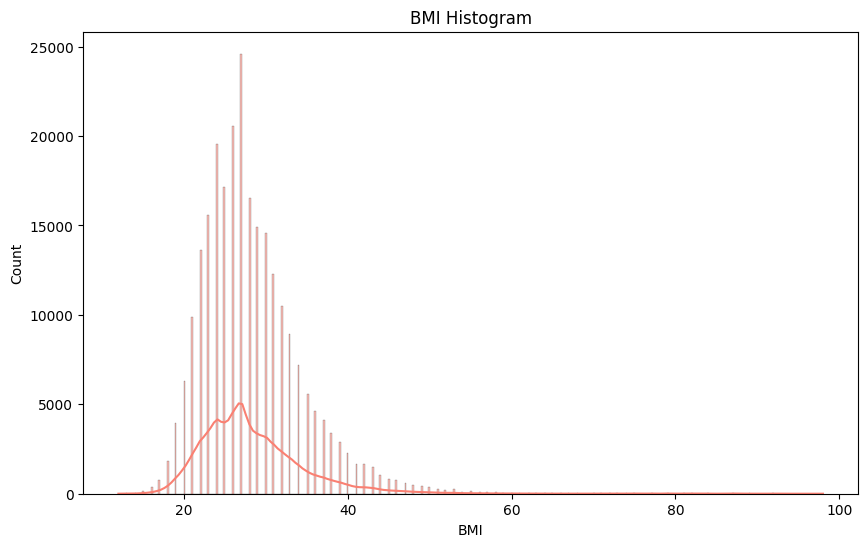

In [19]:
# Create visualisations for the : Age, BMI, Income, High BP

plt.figure(figsize=(10, 6))

sns.histplot(df['BMI'], kde=True, color='salmon')
plt.title('BMI Histogram')

plt.show()

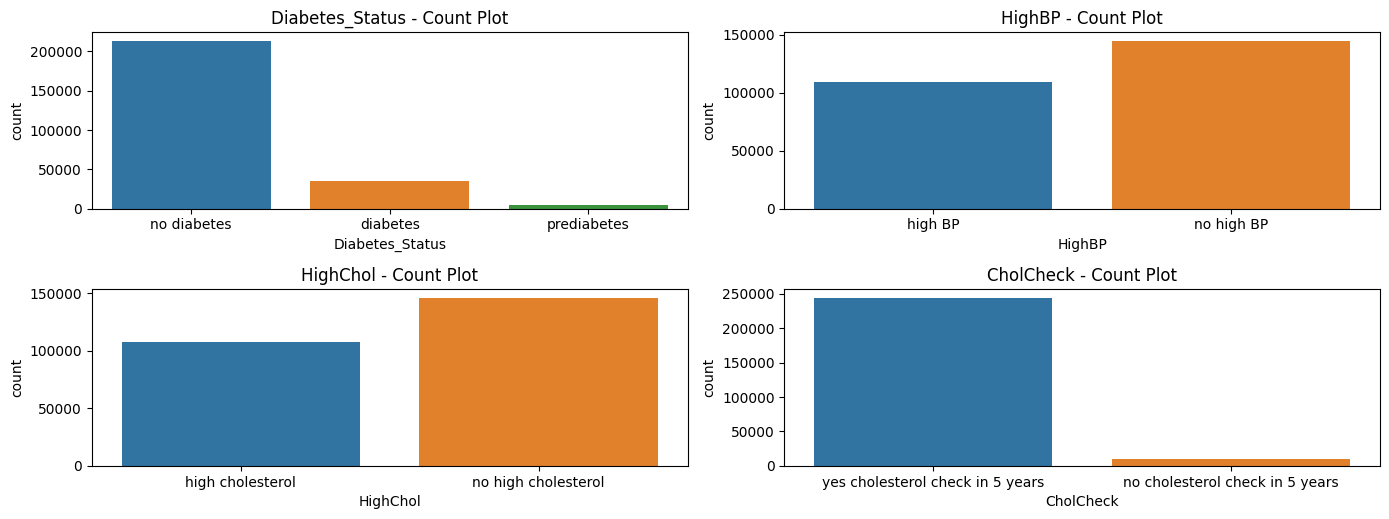

In [20]:
# Categorical column plots
categorical_columns = ['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck']

# Bar plots for categorical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} - Count Plot')


plt.tight_layout()
plt.show()

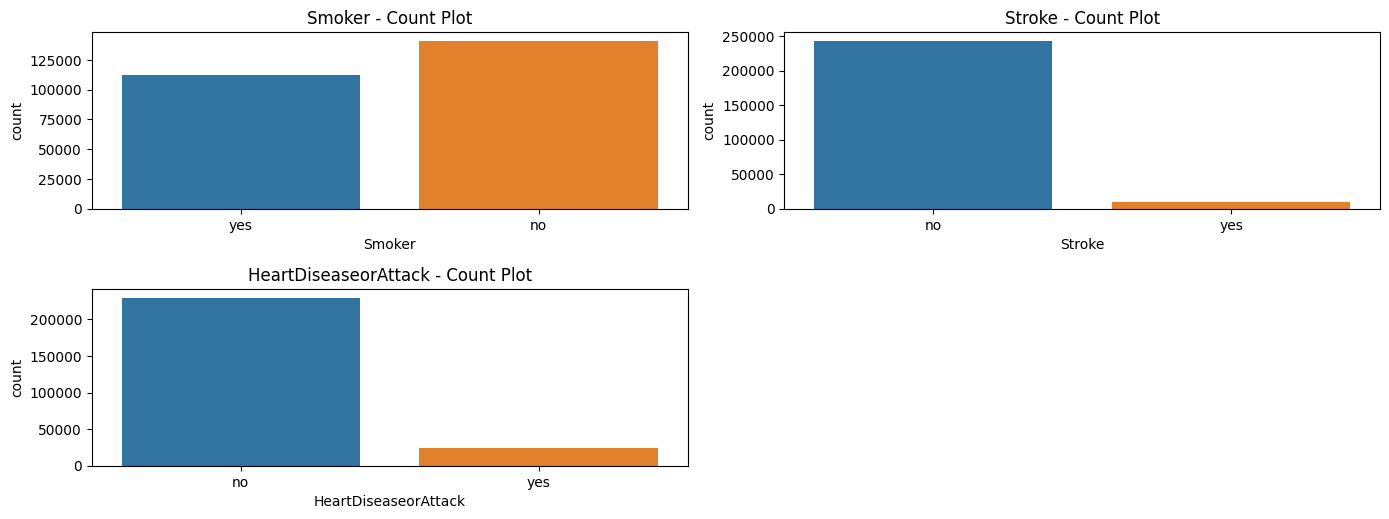

In [21]:
# Categorical column plots
categorical_columns = ['Smoker','Stroke', 'HeartDiseaseorAttack']

# Bar plots for categorical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} - Count Plot')


plt.tight_layout()
plt.show()

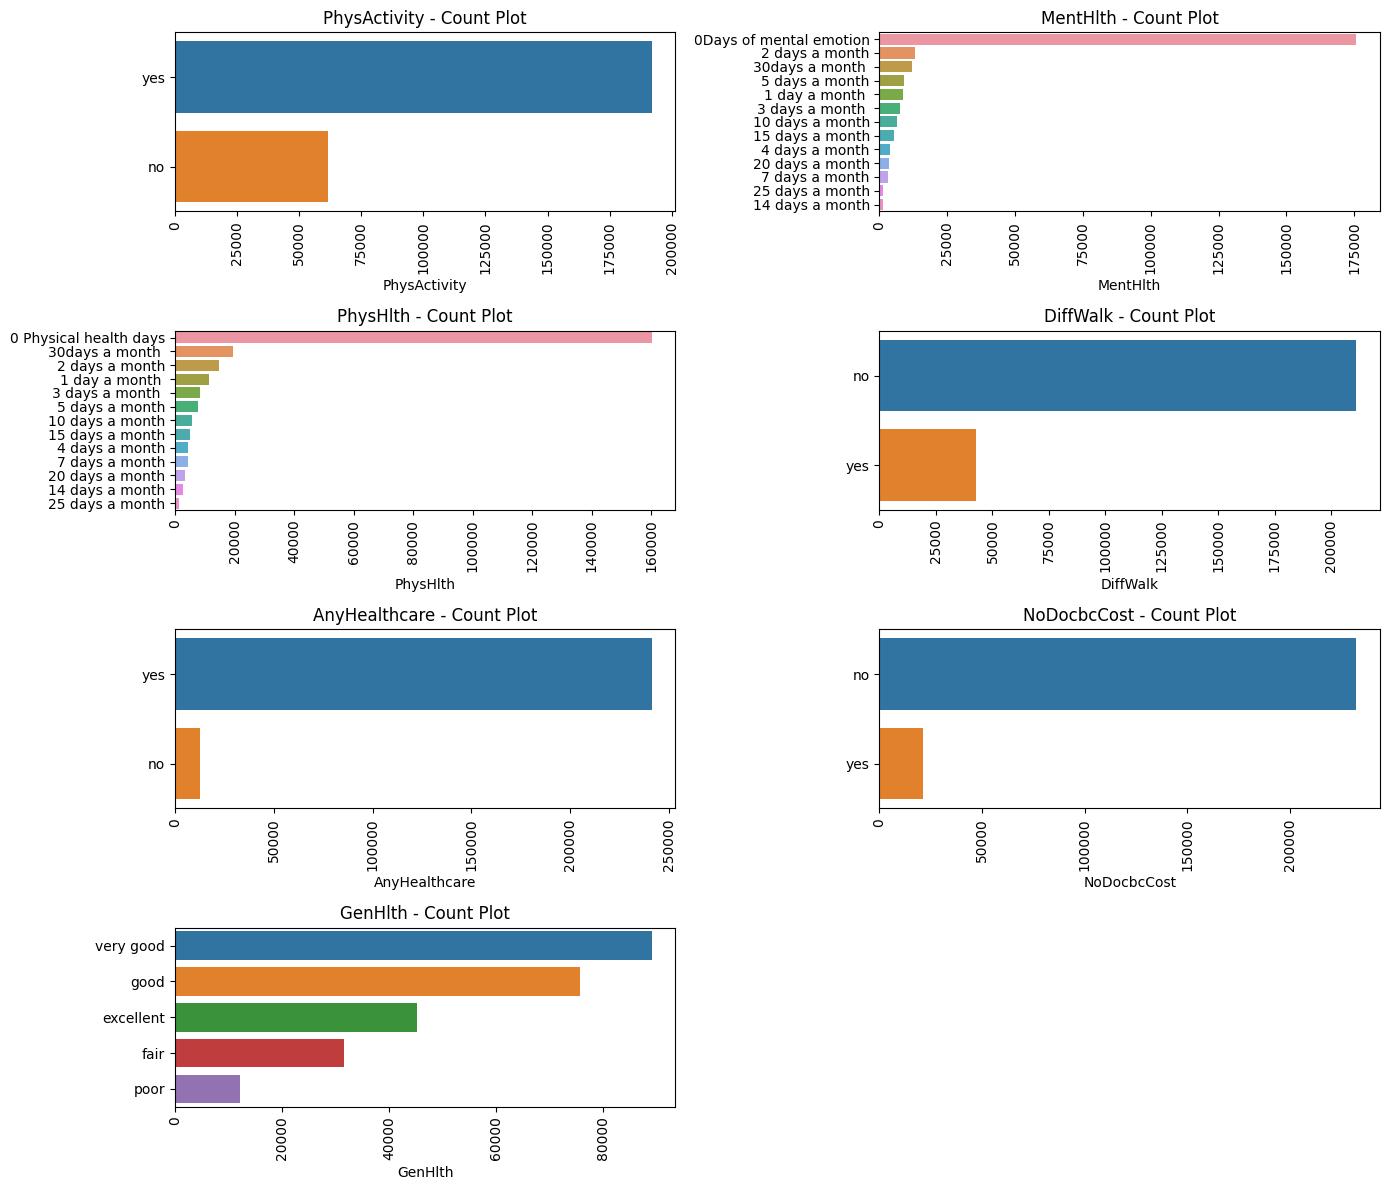

In [22]:
# Categorical column plots
categorical_columns = ['PhysActivity','MentHlth', 'PhysHlth', 'DiffWalk','AnyHealthcare', 'NoDocbcCost', 'GenHlth']

# Bar plots for categorical columns
plt.figure(figsize=(14,12))
for i, col in enumerate(categorical_columns, 1):
    # Get the value counts for the column and sort them in descending order
    value_counts_sorted = df[col].value_counts().sort_values(ascending=False).head(13)

    plt.subplot(4, 2, i)
    sns.barplot(y=value_counts_sorted.index, x=value_counts_sorted)
    plt.xticks(rotation=90)
    plt.title(f'{col} - Count Plot')

plt.tight_layout()
plt.show()

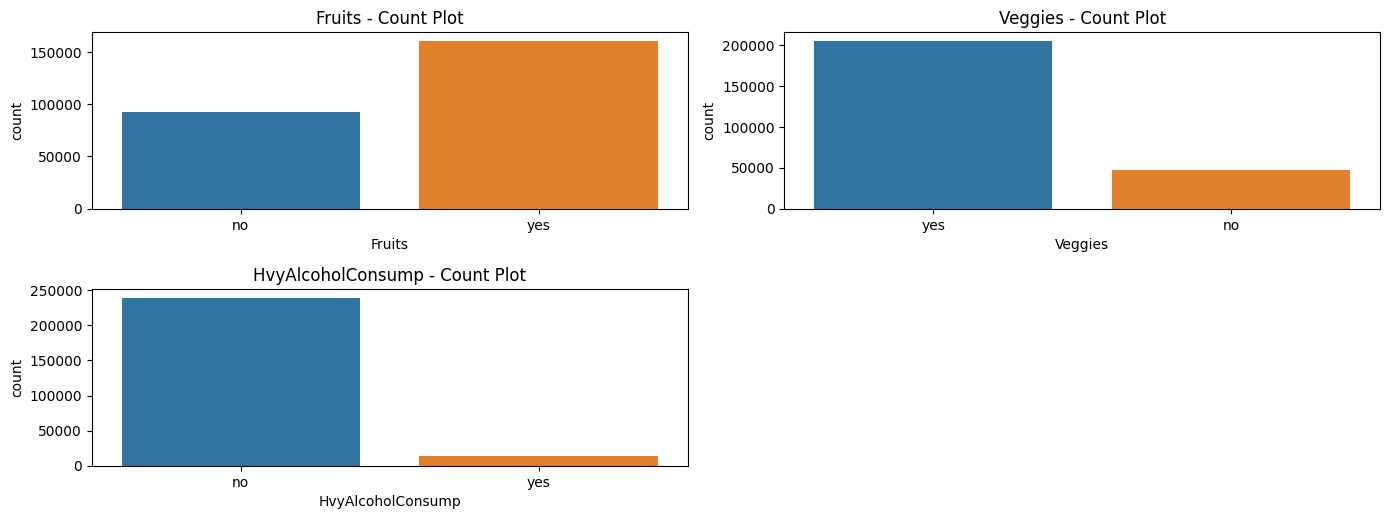

In [23]:
# Categorical column plots
categorical_columns = ['Fruits', 'Veggies','HvyAlcoholConsump',]

# Bar plots for categorical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} - Count Plot')


plt.tight_layout()
plt.show()

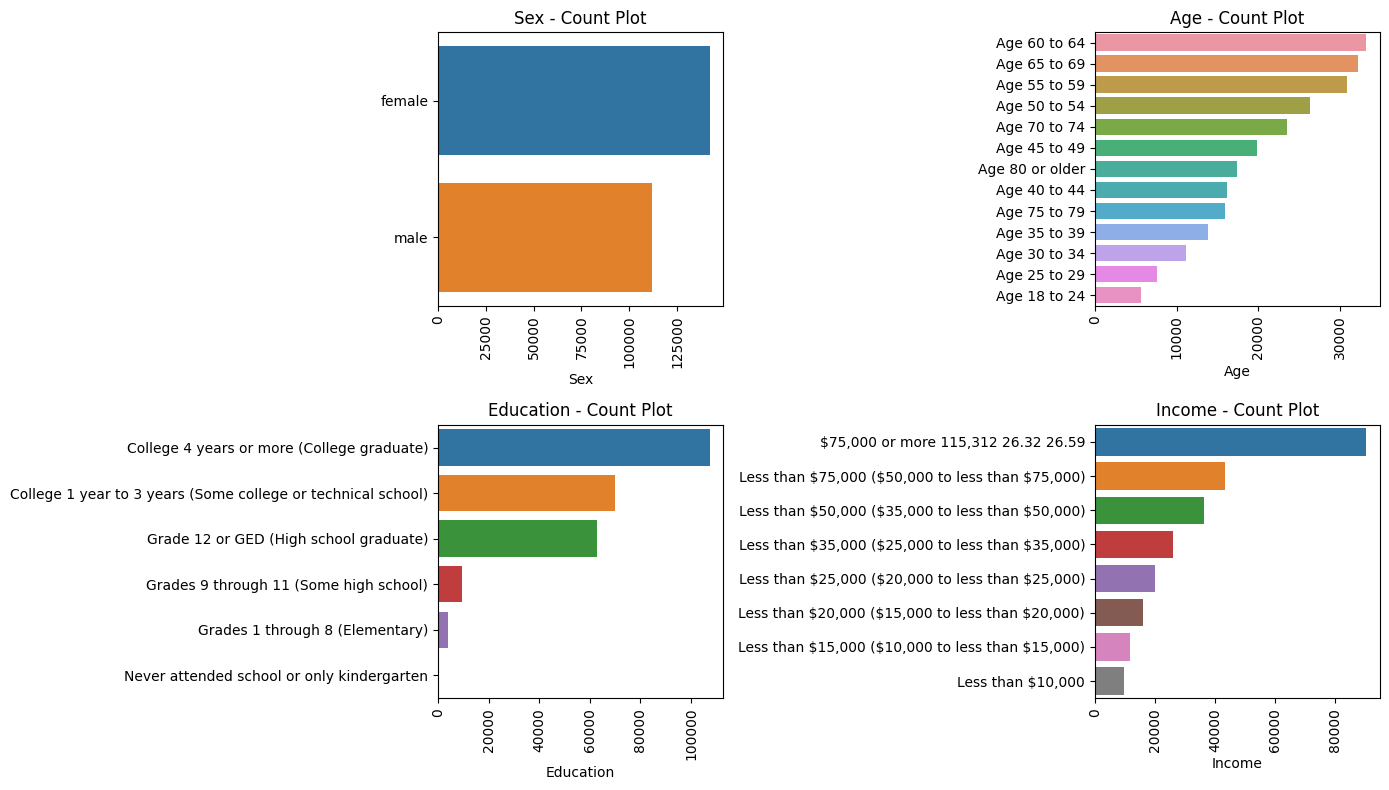

In [24]:
# Categorical column plots
categorical_columns = ['Sex', 'Age', 'Education', 'Income']

plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_columns, 1):
    # Get the value counts for the column and sort them in descending order
    value_counts_sorted = df[col].value_counts().sort_values(ascending=False).head(13)

    plt.subplot(2, 2, i)
    sns.barplot(y=value_counts_sorted.index, x=value_counts_sorted)
    plt.xticks(rotation=90)
    plt.title(f'{col} - Count Plot')

plt.tight_layout()
plt.show()

#### Dealing with Outliers

In [25]:
z_scores = np.abs((data['BMI'] - data['BMI'].mean()) / data['BMI'].std())

# Define a threshold to determine outliers (you can adjust this threshold as needed)
z_score_threshold = 3

# Print the outliers in the 'bmi' column
outliers = data[z_scores > z_score_threshold]
outliers.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
201,2.0,1.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,15.0,0.0,0.0,11.0,5.0,2.0
203,0.0,1.0,1.0,1.0,49.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,15.0,1.0,0.0,0.0,9.0,6.0,6.0
417,2.0,1.0,1.0,1.0,49.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,10.0,15.0,1.0,0.0,10.0,3.0,1.0
658,1.0,0.0,0.0,1.0,50.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,8.0,0.0,0.0,3.0,5.0,6.0
670,2.0,1.0,0.0,1.0,59.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0


In [26]:
data = data.drop(data[(z_scores > z_score_threshold) & (data['Diabetes_Status'].isin([0.0, 1.0]))].index)


In [27]:
outliers[outliers.Diabetes_Status == 'diabetes'].head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


### Summary of Outliers

<Insert Explanation as to why we dropped the outliers>


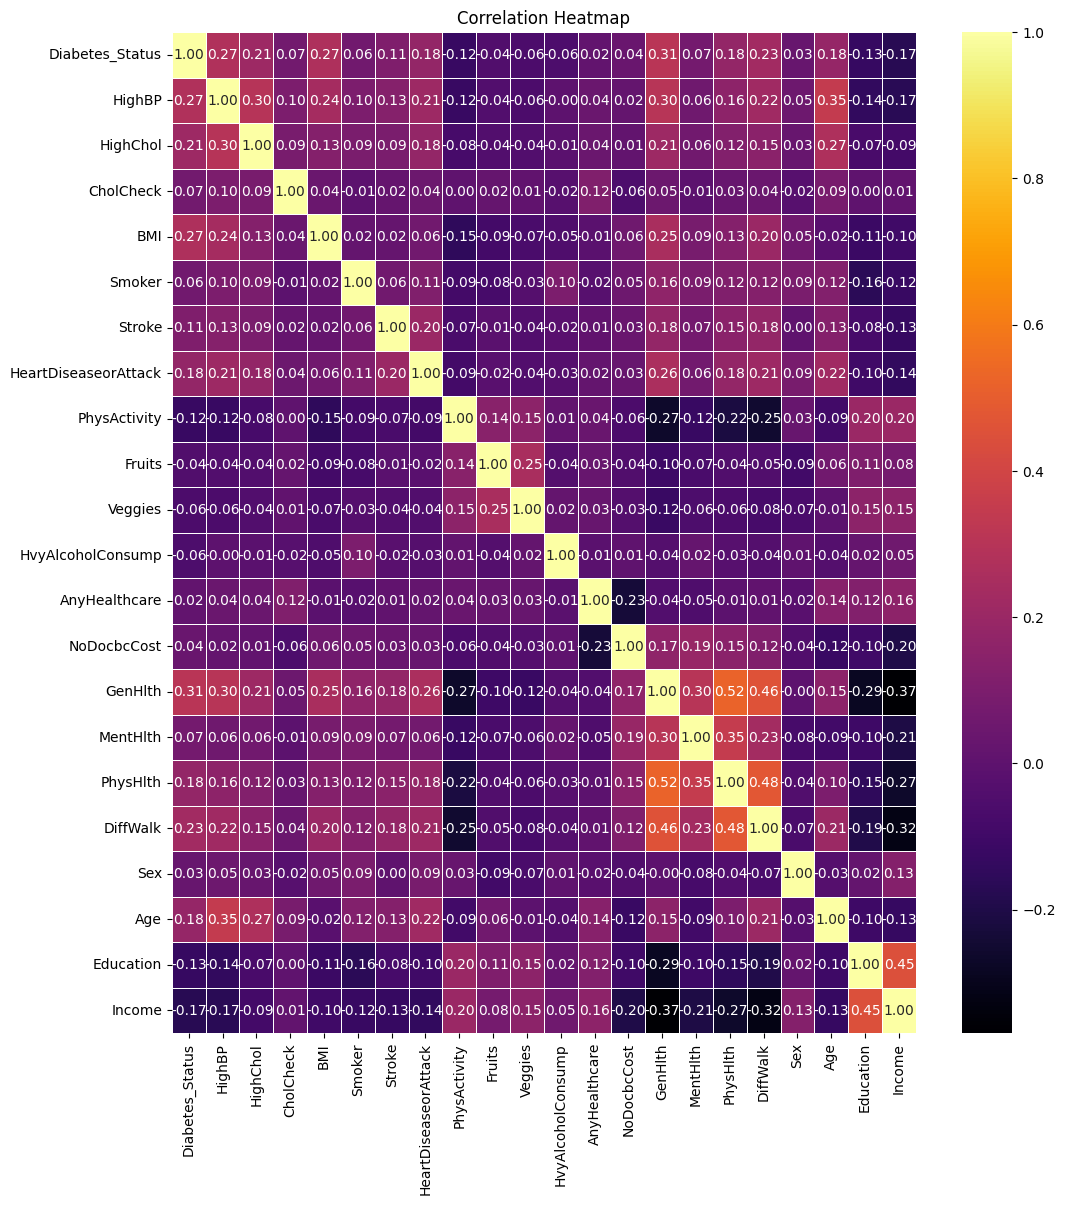

In [28]:
# Correlation heat map

corr_matrix = data.corr()
plt.figure(figsize=(12, 13))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
data.corr()['Diabetes_Status'].sort_values(ascending=False)


Diabetes_Status         1.000000
GenHlth                 0.305646
HighBP                  0.273322
BMI                     0.268321
DiffWalk                0.227820
HighChol                0.209514
Age                     0.184491
HeartDiseaseorAttack    0.180839
PhysHlth                0.178510
Stroke                  0.107570
MentHlth                0.074902
CholCheck               0.067825
Smoker                  0.062940
NoDocbcCost             0.036219
Sex                     0.030735
AnyHealthcare           0.015085
Fruits                 -0.042962
HvyAlcoholConsump      -0.058368
Veggies                -0.059590
PhysActivity           -0.123760
Education              -0.131540
Income                 -0.173493
Name: Diabetes_Status, dtype: float64

In [30]:
corr_matrix

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_Status,1.000000,0.273322,0.209514,0.067825,0.268321,0.062940,0.107570,0.180839,-0.123760,-0.042962,-0.059590,-0.058368,0.015085,0.036219,0.305646,0.074902,0.178510,0.227820,0.030735,0.184491,-0.131540,-0.173493
HighBP,0.273322,1.000000,0.299405,0.098584,0.236464,0.097788,0.129681,0.209705,-0.124326,-0.040137,-0.061008,-0.003811,0.038424,0.017065,0.300010,0.055361,0.160071,0.222485,0.052876,0.345857,-0.141236,-0.170646
HighChol,0.209514,0.299405,1.000000,0.085950,0.126250,0.091396,0.092696,0.181066,-0.078364,-0.041215,-0.039903,-0.011707,0.042326,0.013514,0.209893,0.062462,0.122240,0.146103,0.031245,0.272250,-0.070954,-0.086215
CholCheck,0.067825,0.098584,0.085950,1.000000,0.039449,-0.009847,0.024353,0.044512,0.004134,0.023954,0.006120,-0.023850,0.117626,-0.058637,0.047229,-0.008618,0.031784,0.040692,-0.021894,0.090431,0.001289,0.014082
BMI,0.268321,0.236464,0.126250,0.039449,1.000000,0.019254,0.023911,0.062648,-0.152959,-0.090655,-0.065425,-0.051432,-0.014403,0.058757,0.253887,0.085091,0.125109,0.202447,0.054656,-0.020829,-0.112631,-0.101145
Smoker,0.062940,0.097788,0.091396,-0.009847,0.019254,1.000000,0.061388,0.114911,-0.088006,-0.077605,-0.031180,0.101548,-0.023637,0.049472,0.164105,0.092395,0.117033,0.123258,0.093579,0.120802,-0.162552,-0.124806
Stroke,0.107570,0.129681,0.092696,0.024353,0.023911,0.061388,1.000000,0.203173,-0.069237,-0.013621,-0.041244,-0.017028,0.008557,0.034571,0.178323,0.070086,0.149063,0.177131,0.003258,0.126837,-0.075922,-0.128556
HeartDiseaseorAttack,0.180839,0.209705,0.181066,0.044512,0.062648,0.114911,0.203173,1.000000,-0.087579,-0.020012,-0.039497,-0.029236,0.018851,0.030992,0.259245,0.064626,0.181813,0.213645,0.086496,0.221766,-0.099811,-0.141227
PhysActivity,-0.123760,-0.124326,-0.078364,0.004134,-0.152959,-0.088006,-0.069237,-0.087579,1.000000,0.142325,0.153086,0.012285,0.035139,-0.060897,-0.265031,-0.124435,-0.218070,-0.251371,0.031701,-0.093465,0.199979,0.197953
Fruits,-0.042962,-0.040137,-0.041215,0.023954,-0.090655,-0.077605,-0.013621,-0.020012,0.142325,1.000000,0.254041,-0.035414,0.031355,-0.043934,-0.103513,-0.067792,-0.044539,-0.047470,-0.091500,0.063869,0.110077,0.079528


## Feature Engineering

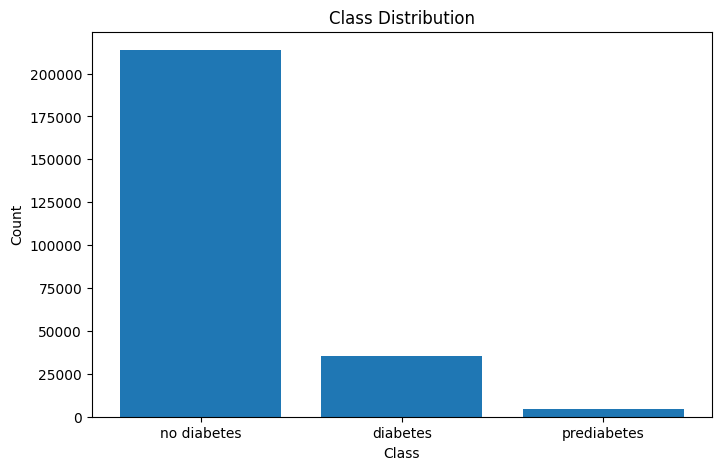

Class Imbalance Ratio: 0.02


In [31]:
# Dealing with the class imbalance

target_column = 'Diabetes_Status'

# Count the occurrences of each class in the target variable
class_counts = df[target_column].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Calculate class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()
print(f'Class Imbalance Ratio: {imbalance_ratio:.2f}')

# Pre-Processing & Feature Engineering

In [32]:
data = data[data['Diabetes_Status'] != 1.0]

data['Diabetes_Status'].value_counts()

0.0    211852
2.0     35346
Name: Diabetes_Status, dtype: int64

In [33]:
# Define the target and features label

#Feature
X = data.drop(['Diabetes_Status'], axis=1)

#Target
y = data['Diabetes_Status']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# print the shapes of the four datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((185398, 21), (61800, 21), (185398,), (61800,))

In [34]:
#Standard Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from imblearn.over_sampling import SMOTE
#instantiate oversampled model
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train_scaled, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0.0: 158909, 2.0: 26489})
New dataset shape Counter({0.0: 158909, 2.0: 158909})


In [36]:
data

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


###### Feature Engineering the Columns

In [37]:
data['Diet'] = data['Fruits']\
              + data['Veggies']
data.head(2)

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diet
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0


In [38]:
data['HighBP_Chol'] = data['HighBP'] \
          + data['HighChol']

High Blood Pressure and Cholestral are important factors that determine whether an individual has diabetes or may be at risk of getting diabetes. For this reason, we have combined the two.

In [39]:
# Drop the Fruits and Veggies Column

data.drop(['Sex','Fruits','Veggies','HighBP','HighChol'], axis=1, inplace=True)
data.head()

,Diabetes_Status,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Diet,HighBP_Chol
0,0.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0,1.0,2.0
1,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0,0.0
2,0.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0,1.0,2.0
3,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,2.0,1.0
4,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0,2.0,2.0


In [40]:
data.columns

Index(['Diabetes_Status', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Age', 'Education', 'Income', 'Diet', 'HighBP_Chol'],
      dtype='object')

# Modeling

1. Logistic Regression -- Baseline
2. Multinomial
3. Tuned Log Reg

In [41]:
# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict the test set result
y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = gb_model.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.3f}")

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.839
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91     52943
         2.0       0.44      0.49      0.47      8857

    accuracy                           0.84     61800
   macro avg       0.68      0.69      0.69     61800
weighted avg       0.85      0.84      0.84     61800



In [47]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to oversample the minority classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create a RandomForestClassifier with custom class_weight
rf_model_final = RandomForestClassifier(criterion='entropy', max_depth=31, max_features='auto', random_state=42,
                                        class_weight='balanced')

# Fit the model on the resampled training data
rf_model_final.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = rf_model_final.predict(X_test_scaled)


# Instantiate the MulticlassEvaluator class
class MulticlassEvaluator:
    def __init__(self, n_class=2):
        self.n_class = n_class

    def evaluate(self, y_true, y_pred, X_test, X_train, clf):
        print(f"Training score: {clf.score(X_train, y_train)}\nTest Score: {clf.score(X_test, y_test)}")

        # Print classification report
        print('\n')
        print('Classification Report')
        print('_____')
        print(classification_report(y_true=y_true, y_pred=y_pred))

        # Calculate the confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Create a figure for the confusion matrix heatmap
        plt.figure(figsize=(6, 4))
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(len(np.unique(y_true)))
        plt.xticks(tick_marks, ['0', '1'])
        plt.yticks(tick_marks, ['0', '1'])

        # Add labels to the heatmap
        for i in range(len(np.unique(y_true))):
            for j in range(len(np.unique(y_true))):
                plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        pred_prob = clf.predict_proba(X_test)

        # Plot the ROC curve
        fpr = {}
        tpr = {}
        thresh = {}

        for i in range(self.n_class):
            fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:, i], pos_label=i)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr[0], tpr[0], linestyle='--', color='red', label='0')
        plt.plot(fpr[1], tpr[1], linestyle='--', color='black', label='1')

        plt.title('Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.plot([0, 1], [0, 1], ls='--', color='cyan')

        # Calculate and print the ROC-AUC score
        roc_auc = roc_auc_score(y_true, pred_prob[:, 1])
        print(f"\nROC-AUC Score: {roc_auc}")


# Instantiate the MulticlassEvaluator and evaluate the model
evaluator = MulticlassEvaluator()
evaluator.evaluate(y_test, y_pred, X_test_scaled, X_train_scaled, rf_model_final)


InvalidParameterError: ignored